<a href="https://colab.research.google.com/github/taylorec/Ecommerce-Analytics-with-Python/blob/main/Events_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google BigQuery - thelook_ecommerce database
> Tables: distribution_centers, events, inventory_items, order_items, orders, products and users

> Objective: gather data from the events and users tables into a dataframe to explore the features listed below and to model a prediction for event types re-categorized as either 'purchased' or 'not purchased'.

        user_id, 
        ip_address,
        browser_type,
        traffic_source,
        event_type,
        age,
        gender,
        users.country

> Insights: the various features of browser type, traffic source, location and gender of users are all identical in regards to purchase rate and do not provide any insights into predicting if a user will complete a purchase.



In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
from google.cloud import bigquery
 
client = bigquery.Client(project=project_id)

In [ ]:
events_log = client.query('''
SELECT 
        events.id,
        events.user_id,
        events.ip_address,
        events.browser,
        events.traffic_source,
        events.event_type,
        users.age,
        users.gender,
        users.country
FROM
        `bigquery-public-data.thelook_ecommerce.events` events
INNER JOIN
        `bigquery-public-data.thelook_ecommerce.users` users ON events.user_id = users.id
''' ).to_dataframe()

In [ ]:
events = events_log.copy()

In [ ]:
events.head()

,id,user_id,ip_address,browser,traffic_source,event_type,age,gender,country
0,1055512,81226,61.248.88.178,Firefox,Email,cart,47,F,Poland
1,274054,21203,112.23.18.118,Chrome,Email,cart,51,F,Poland
2,1086658,83669,38.71.42.230,Chrome,Email,cart,15,F,Poland
3,1173952,90315,113.152.120.244,Chrome,Email,cart,70,M,Poland
4,1086671,83669,94.66.145.107,Firefox,Email,cart,15,F,Poland


In [ ]:
# check for missing data
events.isna().sum()

id                0
user_id           0
ip_address        0
browser           0
traffic_source    0
event_type        0
age               0
gender            0
country           0
dtype: int64

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300964 entries, 0 to 1300963
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1300964 non-null  Int64 
 1   user_id         1300964 non-null  Int64 
 2   ip_address      1300964 non-null  object
 3   browser         1300964 non-null  object
 4   traffic_source  1300964 non-null  object
 5   event_type      1300964 non-null  object
 6   age             1300964 non-null  Int64 
 7   gender          1300964 non-null  object
 8   country         1300964 non-null  object
dtypes: Int64(3), object(6)
memory usage: 93.1+ MB


### EDA

In [ ]:
events.describe()

,id,user_id,age
count,1300964.0,1300964.0,1300964.0
mean,650482.5,50108.611593,40.972802
std,375556.102141,28818.302482,17.072057
min,1.0,2.0,12.0
25%,325241.75,25163.0,26.0
50%,650482.5,50102.0,41.0
75%,975723.25,74979.0,56.0
max,1300964.0,100000.0,70.0


In [ ]:
events.describe(include='object')

,ip_address,browser,traffic_source,event_type,gender,country
count,1300964,1300964,1300964,1300964,1300964,1300964
unique,181340,5,5,5,2,15
top,204.146.223.203,Chrome,Email,cart,F,China
freq,18,648819,583992,343967,651671,439482


In [ ]:
print('number of different users:', events['user_id'].nunique())

number of different users: 80154


In [ ]:
print('number of different ip addresses:', events['ip_address'].nunique())

number of different ip addresses: 181340


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


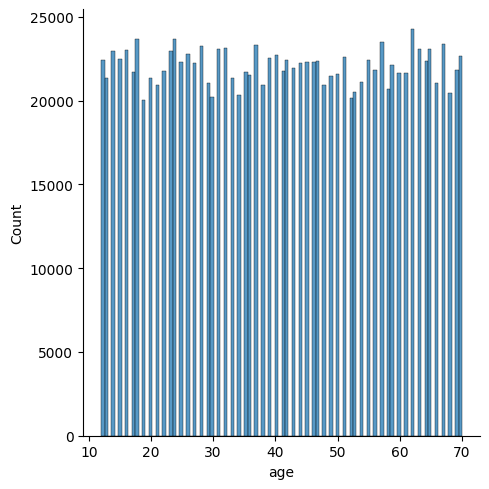

In [ ]:
# plot showing age distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(events['age'])

<Axes: xlabel='gender', ylabel='count'>

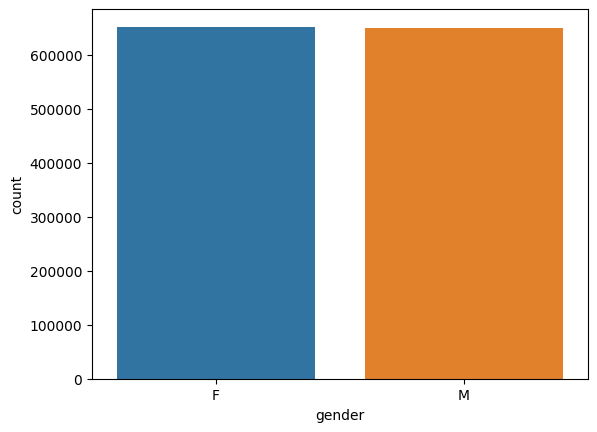

In [ ]:
# count plot by gender

sns.countplot(x='gender', data=events)

<Axes: xlabel='country', ylabel='count'>

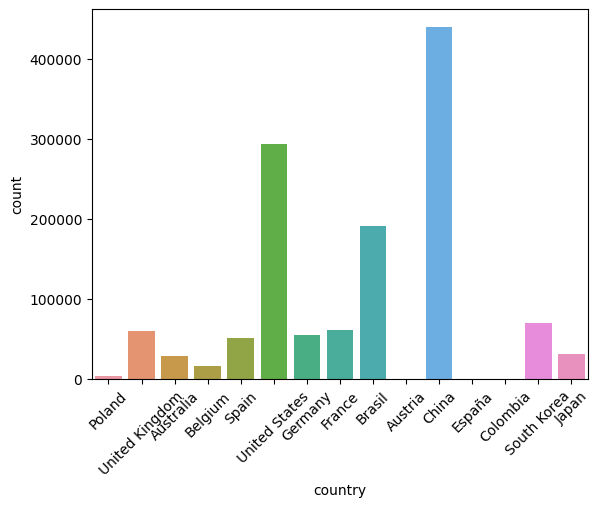

In [ ]:
# count plot by country
plt.xticks(rotation=45)
sns.countplot(x='country', data=events)

<Axes: xlabel='browser', ylabel='count'>

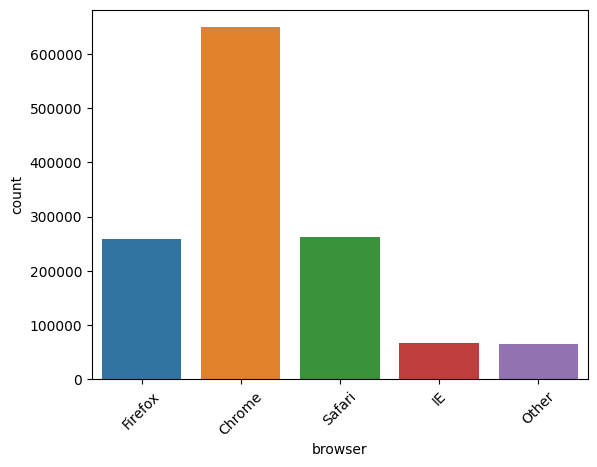

In [ ]:
# count plot by browser
plt.xticks(rotation=45)
sns.countplot(x='browser', data=events)

<Axes: xlabel='event_type', ylabel='count'>

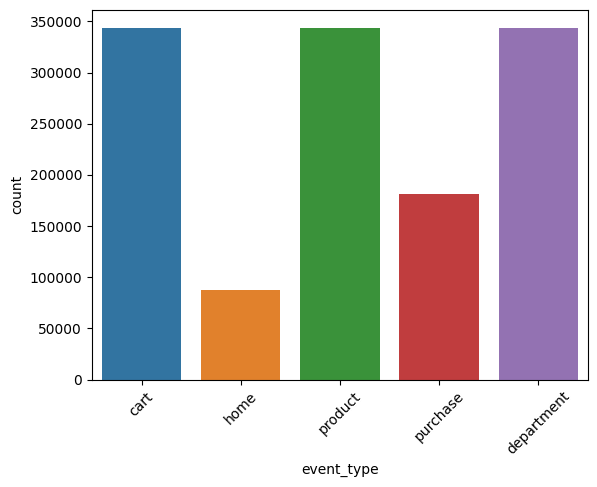

In [ ]:
# count plot by event type
plt.xticks(rotation=45)
sns.countplot(x='event_type', data=events)

<Axes: xlabel='traffic_source', ylabel='count'>

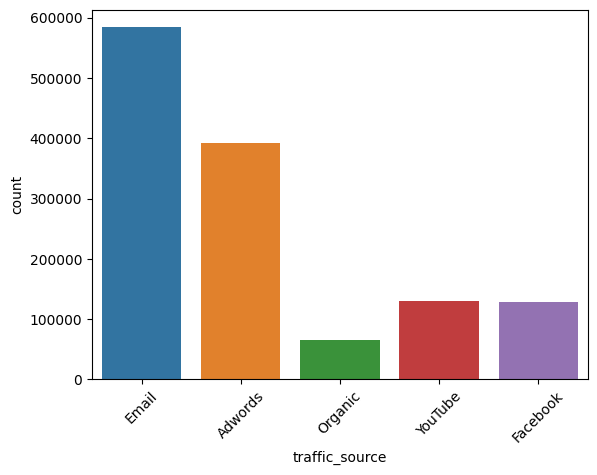

In [ ]:
# count plot by traffic source
plt.xticks(rotation=45)
sns.countplot(x='traffic_source', data=events)

In [ ]:
# percentage of events that end in purchase
events[events ['event_type']=='purchase'].shape[0]/events.shape[0]*(100)

13.939586337515872

In [ ]:
def purch_indicator(event_type):
   if event_type == 'purchase':
      event_type = 1
   else:
      event_type = 0
   return event_type

In [ ]:
events['purchase'] = events['event_type'].apply(lambda e: purch_indicator(e))

In [ ]:
events.head()

,id,user_id,ip_address,browser,traffic_source,event_type,age,gender,country,purchase
0,1055512,81226,61.248.88.178,Firefox,Email,cart,47,F,Poland,0
1,274054,21203,112.23.18.118,Chrome,Email,cart,51,F,Poland,0
2,1086658,83669,38.71.42.230,Chrome,Email,cart,15,F,Poland,0
3,1173952,90315,113.152.120.244,Chrome,Email,cart,70,M,Poland,0
4,1086671,83669,94.66.145.107,Firefox,Email,cart,15,F,Poland,0


In [ ]:
events['purchase'].value_counts()

0    1119615
1     181349
Name: purchase, dtype: int64

In [ ]:
browser_events = events.groupby('browser')['purchase'].count()
browser_events

browser
Chrome     648819
Firefox    257743
IE          66529
Other       65458
Safari     262415
Name: purchase, dtype: int64

In [ ]:
browser_purchased = events.groupby('browser')['purchase'].sum()
browser_purchased

browser
Chrome     90472
Firefox    36039
IE          9289
Other       9061
Safari     36488
Name: purchase, dtype: int64

In [ ]:
# purchase rate by browser
browser_purchased/browser_events

browser
Chrome     0.139441
Firefox    0.139825
IE         0.139623
Other      0.138425
Safari     0.139047
Name: purchase, dtype: float64

In [ ]:
gender_events = events.groupby('gender')['purchase'].count()
gender_events

gender
F    651671
M    649293
Name: purchase, dtype: int64

In [ ]:
gender_purchased = events.groupby('gender')['purchase'].sum()
gender_purchased

gender
F    90966
M    90383
Name: purchase, dtype: int64

In [ ]:
# Purchase rate by gender
gender_purchased/gender_events

gender
F    0.139589
M    0.139202
Name: purchase, dtype: float64

In [ ]:
country_events = events.groupby('country')['purchase'].count()
country_events

country
Australia          28392
Austria               72
Belgium            16372
Brasil            190672
China             439482
Colombia             122
España                14
France             61341
Germany            55127
Japan              31307
Poland              3828
South Korea        69615
Spain              51488
United Kingdom     59799
United States     293333
Name: purchase, dtype: int64

In [ ]:
country_purchased = events.groupby('country')['purchase'].sum()
country_purchased

country
Australia          3949
Austria               8
Belgium            2330
Brasil            26510
China             61413
Colombia             22
España                2
France             8473
Germany            7639
Japan              4372
Poland              524
South Korea        9671
Spain              7265
United Kingdom     8342
United States     40829
Name: purchase, dtype: int64

In [ ]:
# Purchase rate by country
country_purchased/country_events

country
Australia         0.139088
Austria           0.111111
Belgium           0.142316
Brasil            0.139035
China             0.139740
Colombia          0.180328
España            0.142857
France            0.138129
Germany           0.138571
Japan             0.139649
Poland            0.136886
South Korea       0.138921
Spain             0.141101
United Kingdom    0.139501
United States     0.139190
Name: purchase, dtype: float64

In [ ]:
traffic_source_events = events.groupby('traffic_source')['purchase'].count()
traffic_source_events

traffic_source
Adwords     392299
Email       583992
Facebook    129088
Organic      65365
YouTube     130220
Name: purchase, dtype: int64

In [ ]:
traffic_source_purchased = events.groupby('traffic_source')['purchase'].sum()
traffic_source_purchased

traffic_source
Adwords     54595
Email       81529
Facebook    18016
Organic      9064
YouTube     18145
Name: purchase, dtype: int64

In [ ]:
# Purchase rate by traffic_source
traffic_source_purchased/traffic_source_events

traffic_source
Adwords     0.139167
Email       0.139606
Facebook    0.139564
Organic     0.138667
YouTube     0.139341
Name: purchase, dtype: float64

The purchase rates for country, gender, traffic source and browser type are all identical. This may be a factor in modeling purchase predictions. 

### Purchase event modeling

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300964 entries, 0 to 1300963
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1300964 non-null  Int64 
 1   user_id         1300964 non-null  Int64 
 2   ip_address      1300964 non-null  object
 3   browser         1300964 non-null  object
 4   traffic_source  1300964 non-null  object
 5   event_type      1300964 non-null  object
 6   age             1300964 non-null  Int64 
 7   gender          1300964 non-null  object
 8   country         1300964 non-null  object
 9   purchase        1300964 non-null  int64 
dtypes: Int64(3), int64(1), object(6)
memory usage: 103.0+ MB


In [ ]:
events['gender'] = events['gender'].map({'F':0, 'M':1})

In [ ]:
Gmap = {'Australia':1,'Belgium':2, 'Brasil':3, 'China':4, 'Colombia':5, 'España':6, 'France':7, 'Germany':8, 'Japan':9, 'Poland':10, 'South Korea':11, 'Spain':12, 'United Kingdom':13, 'United States':14, 'Austria':15}

In [ ]:
events['country'] = events['country'].map(Gmap)

In [ ]:
Tmap = {'Email':1, 'Adwords':2, 'Organic':3, 'YouTube':4, 'Facebook':5}

In [ ]:
events['traffic_source'] = events['traffic_source'].map(Tmap)

In [ ]:
Bmap = {'Chrome':1, 'Firefox':2, 'IE':3, 'Other':4, 'Safari':5}

In [ ]:
events['browser'] = events['browser'].map(Bmap)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = events[['age', 'gender', 'country', 'browser', 'traffic_source']]
y = events['purchase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train.shape

(910674, 5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=100, min_samples_split=2,min_samples_leaf=3)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
# fit random forest model

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=3, n_estimators=1000)

In [ ]:
# for gradient boosting model

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
gbc_pred = gbc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# random forest confusion matrix

print(confusion_matrix(y_test,rfc_pred))

[[335909      0]
 [ 54381      0]]


In [ ]:
# gradient boosting confusion matrix

print(confusion_matrix(y_test,gbc_pred))

[[335909      0]
 [ 54381      0]]


In [ ]:
# random forest report

print(classification_report(y_test,rfc_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93    335909
           1       0.00      0.00      0.00     54381

    accuracy                           0.86    390290
   macro avg       0.43      0.50      0.46    390290
weighted avg       0.74      0.86      0.80    390290



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# gradient boosting report

print(classification_report(y_test,gbc_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93    335909
           1       0.00      0.00      0.00     54381

    accuracy                           0.86    390290
   macro avg       0.43      0.50      0.46    390290
weighted avg       0.74      0.86      0.80    390290



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
importances = rfc.feature_importances_
indices = np.argsort(importances)
Features = X_train.columns
Features

Index(['age', 'gender', 'country', 'browser', 'traffic_source'], dtype='object')

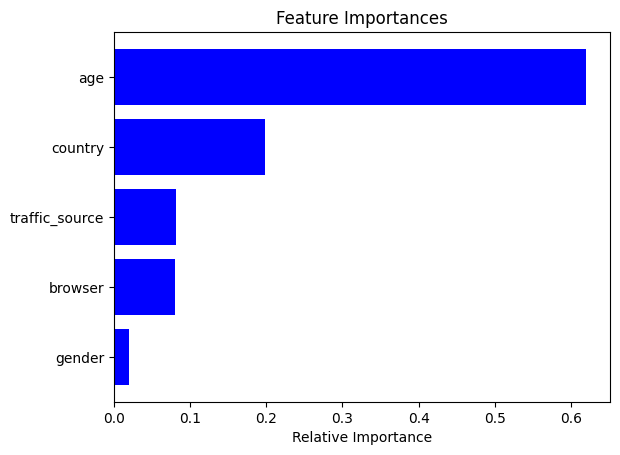

In [ ]:
plt.title('Feature Importances')
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()